<a href="https://colab.research.google.com/github/vitorcghub/caseNeon_creditmodel/blob/develop/caseNeon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
pip install optbinning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.14.0 requires protobuf<4.21,>=3.20.3, but you have protobuf 4.24.3 which is incompatible.


In [21]:
import pandas as pd
from optbinning import OptimalBinning

# Exploração dos Dados

In [2]:
  credit = pd.read_csv('UCI_Credit_Card.csv')

In [4]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# features categoricas
credit[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


EDUCATION:

1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown

-> Categoria 0 não documentada

MARRIAGE:

1=married, 2=single, 3=others

-> Categoria 0 não documentada

In [7]:
# features de pagamento
credit[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


PAY_N:

-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above

Não está documentado o código -2, e PAY_0 pode se tornar PAY_1 seguindo a padronização dos nomes das outras colunas

In [8]:
# features de valor da fatura
credit[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [9]:
# features de valor pago de fatura
credit[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


# Limpeza e recategorização

In [10]:
# troca o nome da coluna target e o PAY de 0 para 1
credit.rename(columns={"default.payment.next.month": "IsDef",
                    'PAY_0': 'PAY_1'}, inplace=True)

In [11]:
# recategoriza feature de educação
credit['EDUCATION'] = credit['EDUCATION'].apply(lambda x: 5 if x in [0, 6] else x)

In [13]:
# recategoriza feature de estado civil
credit['MARRIAGE'] = credit['MARRIAGE'].replace(0, 3)

# Análise Bivariada

In [17]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'IsDef'],
      dtype='object')

In [41]:
num = ['LIMIT_BAL', 'AGE', 'BILL_AMT1',
        'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
        'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
        'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

cat = ['PAY_1', 'PAY_2', 'PAY_3',
        'PAY_4', 'PAY_5', 'PAY_6',
       'SEX', 'EDUCATION', 'MARRIAGE']

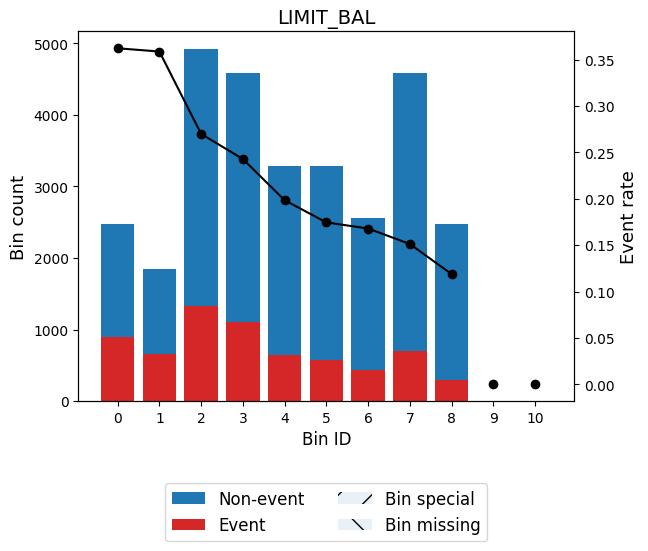

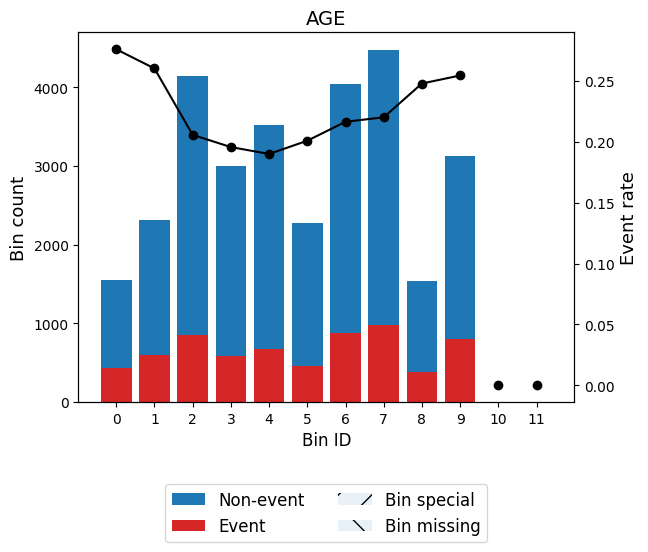

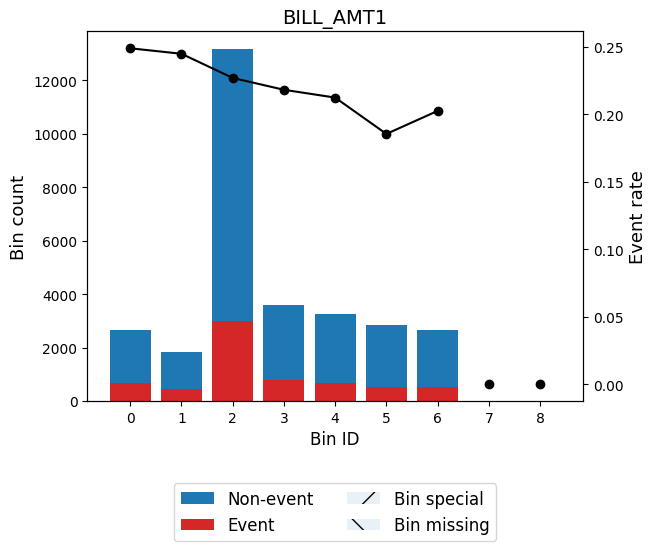

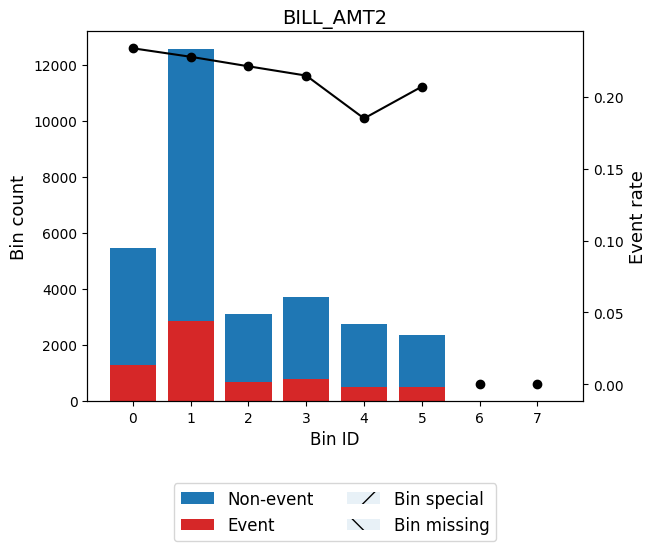

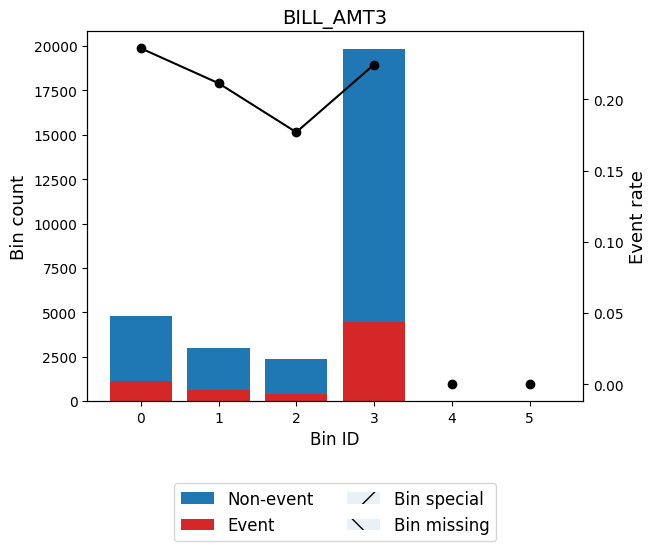

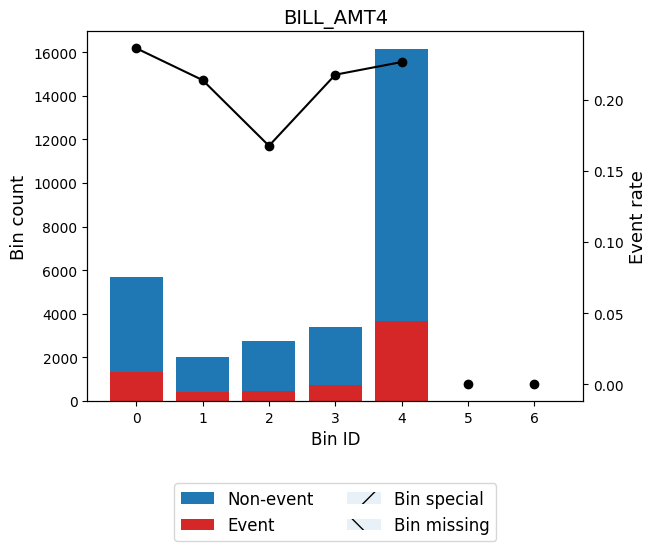

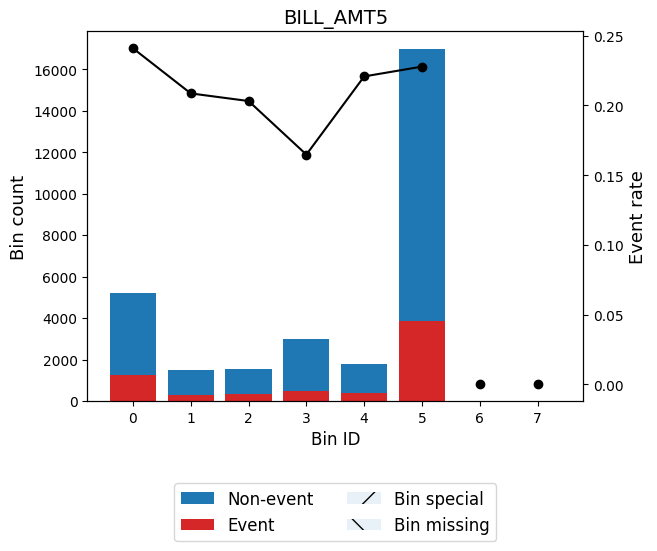

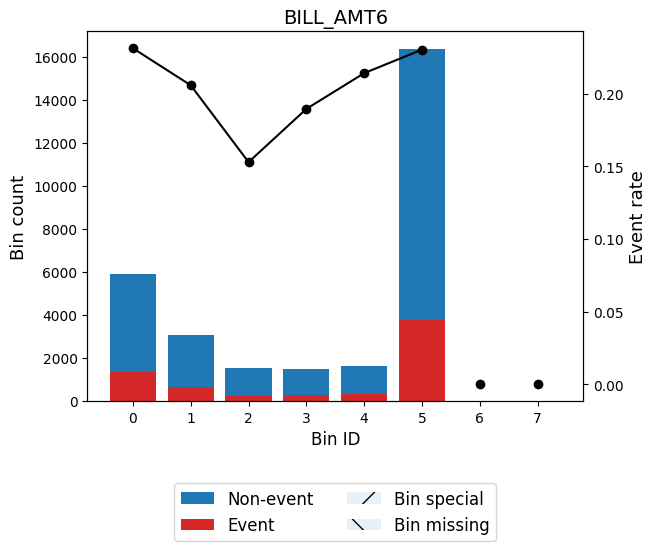

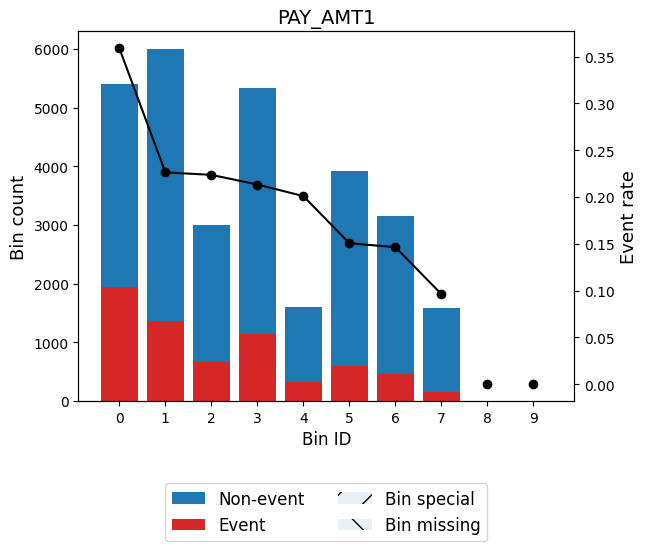

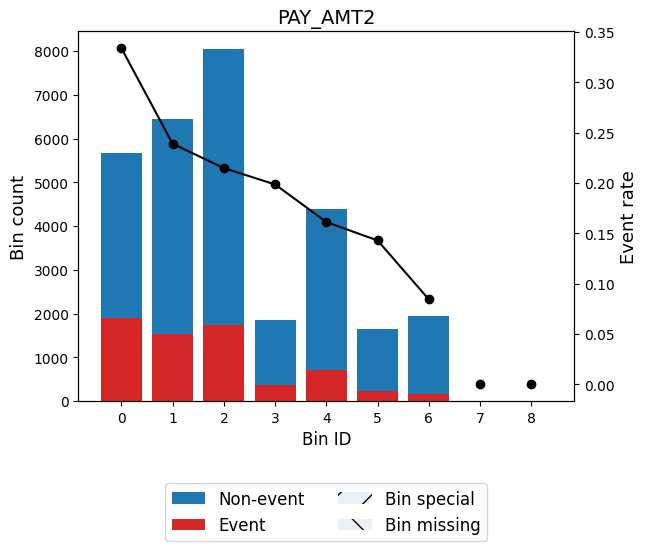

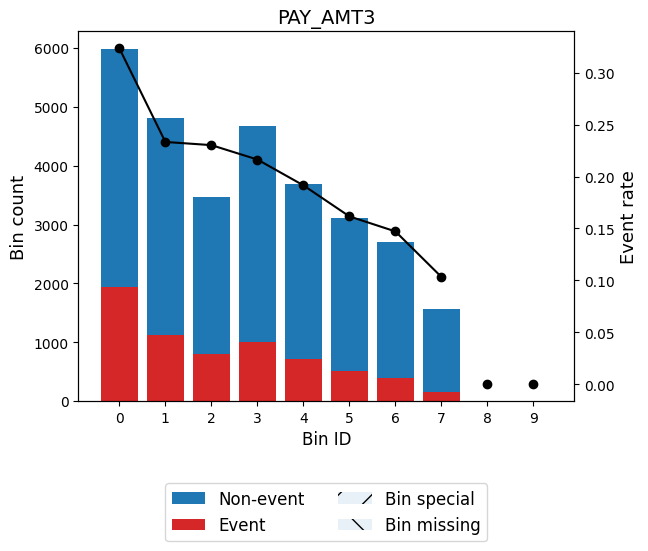

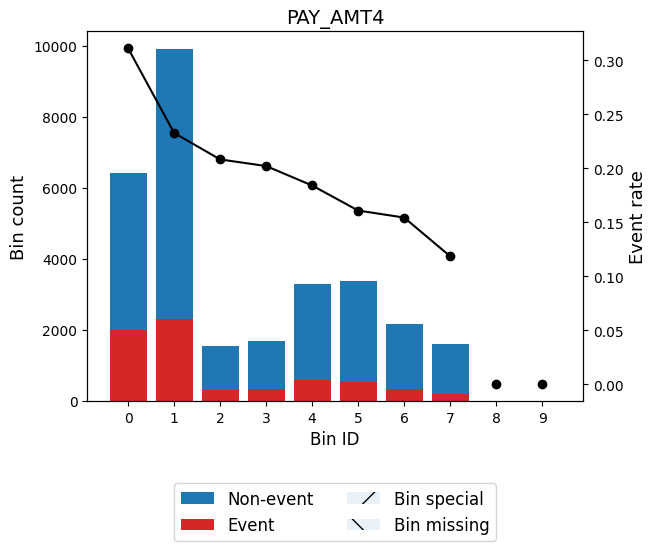

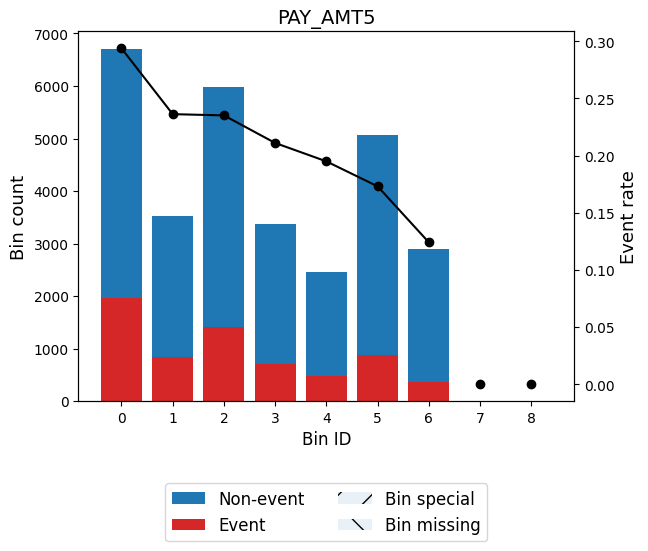

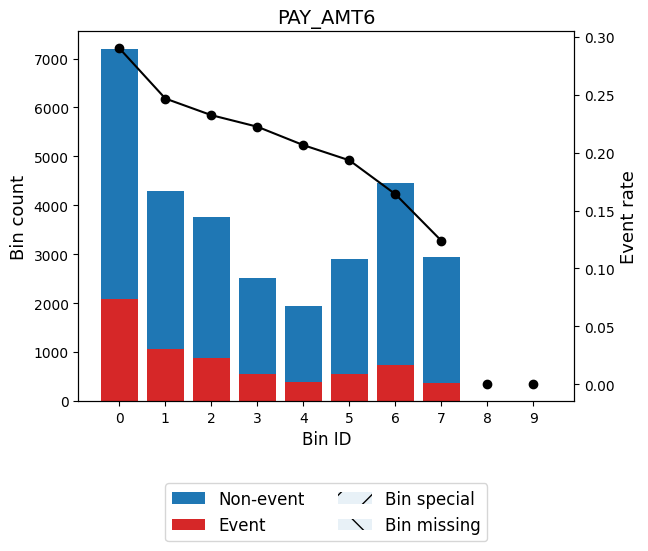

In [42]:
y = credit.IsDef
num_tables = {}

for var_num in num:

  x_num = credit[var_num].values
  optb_num = OptimalBinning(name=var_num, dtype="numerical", solver="cp")
  optb_num.fit(x_num, y)
  binning_table = optb_num.binning_table
  num_tables[var_num] = binning_table.build()
  binning_table.plot(metric="event_rate")

In [31]:
for num_var, table in num_tables.items():
  print(num_var)
  print(table)

LIMIT_BAL
                           Bin  Count  Count (%)  Non-event  Event  \
0             (-inf, 25000.00)   2471   0.082367       1576    895   
1         [25000.00, 45000.00)   1840   0.061333       1180    660   
2         [45000.00, 75000.00)   4921   0.164033       3593   1328   
3        [75000.00, 125000.00)   4580   0.152667       3468   1112   
4       [125000.00, 165000.00)   3282   0.109400       2631    651   
5       [165000.00, 205000.00)   3284   0.109467       2711    573   
6       [205000.00, 245000.00)   2555   0.085167       2126    429   
7       [245000.00, 365000.00)   4591   0.153033       3897    694   
8             [365000.00, inf)   2476   0.082533       2182    294   
9                      Special      0   0.000000          0      0   
10                     Missing      0   0.000000          0      0   
Totals                          30000   1.000000      23364   6636   

        Event rate       WoE        IV        JS  
0         0.362202 -0.692865

In [38]:
LIMIT_BAL = list(num_tables.items())[0][1]
LIMIT_BAL

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 25000.00)",2471,0.082367,1576,895,0.362202,-0.692865,0.046710,0.005725
1,"[25000.00, 45000.00)",1840,0.061333,1180,660,0.358696,-0.677657,0.033173,0.004069
2,"[45000.00, 75000.00)",4921,0.164033,3593,1328,0.269864,-0.263374,0.012204,0.001521
3,"[75000.00, 125000.00)",4580,0.152667,3468,1112,0.242795,-0.121269,0.002321,0.000290
4,"[125000.00, 165000.00)",3282,0.109400,2631,651,0.198355,0.137923,0.002001,0.000250
5,"[165000.00, 205000.00)",3284,0.109467,2711,573,0.174482,0.2955,0.008772,0.001093
6,"[205000.00, 245000.00)",2555,0.085167,2126,429,0.167906,0.341854,0.009007,0.001120
7,"[245000.00, 365000.00)",4591,0.153033,3897,694,0.151165,0.466803,0.029042,0.003598
8,"[365000.00, inf)",2476,0.082533,2182,294,0.118740,0.74573,0.036606,0.004473
9,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


In [43]:
ivs = {}
for num_var, table in num_tables.items():
  soma_IV = table.loc['Totals']['IV']
  ivs[num_var] = soma_IV

ivs

{'LIMIT_BAL': 0.17983606897027332,
 'AGE': 0.022201886786308505,
 'BILL_AMT1': 0.009524683452261234,
 'BILL_AMT2': 0.006641913094817542,
 'BILL_AMT3': 0.0073686699218705985,
 'BILL_AMT4': 0.011844941612451589,
 'BILL_AMT5': 0.015832416458833817,
 'BILL_AMT6': 0.014170739016679812,
 'PAY_AMT1': 0.1847560223674365,
 'PAY_AMT2': 0.16504107303774435,
 'PAY_AMT3': 0.13207401134022886,
 'PAY_AMT4': 0.11124475514045344,
 'PAY_AMT5': 0.09285231167652436,
 'PAY_AMT6': 0.0985258391679237}